[Reference: Datasist Documentation](https://risingodegua.gitbook.io/datasist-doc/quickstart/part-1)

# **Datasist** 
It is a python package which makes data analysis, visualization, cleaning and preparation super easy and quick.
The design of datasist is currently centered around 5 modules:
- Structdata
- Feature Engineering
- Timeseries
- Visualization
- Model

In this notebook we will see the various methods in Datasist that makes our life more easier.

I have used the Kaggle Titanic dataset. You can download the train and test datasets from this url: https://www.kaggle.com/c/titanic/data

**Note:** This notebook is just created to implement and try the different modules and functions of Datasist package. 

In [1]:
# To install datasist
!pip install datasist

# To run in python terminal use
# pip install datasist

In [2]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import datasist and pandas
import datasist as ds
import pandas as pd

In [4]:
# Read the dataset
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

## Structdata module:
This module contains various functions to work particulary on structed data and you can use it to analyse and manipulate the DataFrames.

Functions in this module are:
- **describe**: To get a full description of a dataset at a glance
- **check_train_test_set**: To check the sampling strategy of two dataset
- **display_missing**: To check the missing values and percentage of missing values in your dataset
- **get_cat_feats and get_num_feats**: To retrieve categorical and numerical features respectively as a list
- **get_unique_counts**: To get the unique classes in your categorical features
- **join_train_and_test**: To concatenate both train and test set


In [5]:
# describe function
ds.structdata.describe(train_df)

First five data points


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S




Random five data points


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
125,126,1,3,"Nicola-Yarred, Master. Elias",male,12.0,1,0,2651,11.2417,NaN,C
431,432,1,3,"Thorneycroft, Mrs. Percival (Florence Kate White)",female,NaN,1,0,376564,16.1000,NaN,S
368,369,1,3,"Jermyn, Miss. Annie",female,NaN,0,0,14313,7.7500,NaN,Q
586,587,0,2,"Jarvis, Mr. John Denzil",male,47.0,0,0,237565,15.0000,NaN,S
126,127,0,3,"McMahon, Mr. Martin",male,NaN,0,0,370372,7.7500,NaN,Q




Last five data points


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q




Shape of  data set: (891, 12)


Size of  data set: 10692


Data Types
Note: All Non-numerical features are identified as objects in pandas


,Data Type
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64




Numerical Features in Data set
['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


Categorical Features in Data set


['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']



Statistical Description of Columns


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200




Description of Categorical Features


,count,unique,top,freq
Name,891,891,"Harrington, Mr. Charles H",1
Sex,891,2,male,577
Ticket,891,681,347082,7
Cabin,204,147,B96 B98,4
Embarked,889,3,S,644




Unique class Count of Categorical features


,Feature,Unique Count
0,Name,891
1,Sex,2
2,Ticket,681
3,Cabin,148
4,Embarked,4




Missing Values in Data


,features,missing_counts,missing_percent
0,PassengerId,0,0.0
1,Survived,0,0.0
2,Pclass,0,0.0
3,Name,0,0.0
4,Sex,0,0.0
5,Age,177,19.9
6,SibSp,0,0.0
7,Parch,0,0.0
8,Ticket,0,0.0
9,Fare,0,0.0


The describe function gives an error if datset does not contain both categorical and numerical features. So, as of now I have taken the dataset having both categorical and numerical features.

There are 891 training rows and 418 test rows.
There are 12 training columns and 11 test columns.
Id field is unique.
Train and test sets have distinct Ids.


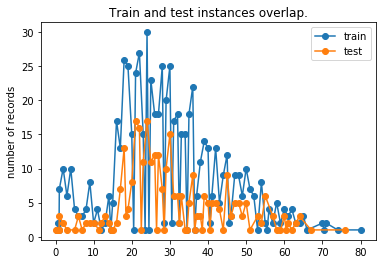

In [6]:
# check_train_test_set
ds.structdata.check_train_test_set(train_df,test_df, index = 'PassengerId', col = 'Age')

In [7]:
# display_missing
ds.structdata.display_missing(train_df)

,features,missing_counts,missing_percent
0,PassengerId,0,0.0
1,Survived,0,0.0
2,Pclass,0,0.0
3,Name,0,0.0
4,Sex,0,0.0
5,Age,177,19.9
6,SibSp,0,0.0
7,Parch,0,0.0
8,Ticket,0,0.0
9,Fare,0,0.0


In [8]:
# get_cat_feats and get_num_feats
cat_feats = ds.structdata.get_cat_feats(train_df)
num_feats = ds.structdata.get_num_feats(train_df)
print("Categorical features list:", cat_feats)
print("Numerical features list:", num_feats)

Categorical features list: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Numerical features list: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [9]:
# get_unique_counts
ds.structdata.get_unique_counts(train_df)

,Feature,Unique Count
0,Name,891
1,Sex,2
2,Ticket,681
3,Cabin,148
4,Embarked,4


In [10]:
# join_train_and_test
all_data, old_train, old_test = ds.structdata.join_train_and_test(train_df, test_df)
print("New size of combined data {}".format(all_data.shape))
print("Old size of train data: {}".format(old_train))
print("Old size of test data: {}".format(old_test))

#later splitting after transformations
train = all_data[:old_train]
test = all_data[old_train:]

New size of combined data (1309, 12)
Old size of train data: 891
Old size of test data: 418


## Feature Engineering
Feature engineering is the process of using data’s domain knowledge to create features that make machine learning algorithms work. It’s the act of extracting important features from raw data and transforming them into formats that are suitable for machine learning.

Some of the functions available in the feature_engineering module of datasist are:
- **drop_missing**: This function drops columns/features with a specified percentage of missing values.
- **drop_redundant**: This function is used to remove features with no variance.
- **convert_dtypes:** This function takes a DataFrame and automatically type-cast features that are not represented in their right types.
- **fill_missing_cats**: This function takes a DataFrame, and automatically fills missing values in the categorical columns. It fills missing values using the mode of the feature. 
- **fill_missing_nums**: This is similar to the fill_missing_cats, except it works on numerical features and you can specify a fill strategy (mean, mode or median).
-  **log_transform**: This function can help you log-transform a set of features. It can also displays a before and after plot which shows the level of skewness to help you decide if log transform is effective.
- **merge_groupby**: This function populates your data set with new features. These features are created by grouping your data on exisitng categorical features and calculating the aggregrate of a numerical feature present in each groups. The aggregrate function is limited to mean and count. The new feature (the aggregrated result) is then merged with the data set.
- **create_balanced_data**: This function creates a balanced data set from an imbalanced one. This function is strictly used in a classification task.
- **get_qcut**: The get_qcut function cut a series into bins using the pandas qcut function and returns the resulting bins as a series with data type float for merging.





In [11]:
# drop_missing: (Just for demonstration)
new_train_df = ds.feature_engineering.drop_missing(train_df, percent=77.0)
ds.structdata.display_missing(new_train_df)

Dropped ['Cabin']


,features,missing_counts,missing_percent
0,PassengerId,0,0.0
1,Survived,0,0.0
2,Pclass,0,0.0
3,Name,0,0.0
4,Sex,0,0.0
5,Age,177,19.9
6,SibSp,0,0.0
7,Parch,0,0.0
8,Ticket,0,0.0
9,Fare,0,0.0


In [12]:
# drop_redundant
df = ds.feature_engineering.drop_redundant(train_df)
df

Dropped []


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


We see there were no redundant columns. So I create my own DataFame to show it

In [13]:
df = pd.DataFrame({'Name': ['Ashley', 'Christine', 'Terressa', 'Anuj', 'Shainee', 'Shubhnoor', 'Tarun'],
                  'Marks': ['92','93','96','82','74','95','98'],
                   'Class': [12,12,12,12,12,12,12]
                   })

df

,Name,Marks,Class
0,Ashley,92,12
1,Christine,93,12
2,Terressa,96,12
3,Anuj,82,12
4,Shainee,74,12
5,Shubhnoor,95,12
6,Tarun,98,12


In [14]:
df = ds.feature_engineering.drop_redundant(df)
df

Dropped ['Class']


,Name,Marks
0,Ashley,92
1,Christine,93
2,Terressa,96
3,Anuj,82
4,Shainee,74
5,Shubhnoor,95
6,Tarun,98


Here class was dropped as it had the same class all through.

In [15]:
# convert_dtypes
df = pd.DataFrame({'Name': ['Ashley', 'Christine', 'Terressa', 'Anuj', 'Shainee', 'Shubhnoor', 'Tarun'],
                  'Marks': ['92','93','96','82','74','95','98'],
                   'DOB': ['1999-01-27','10 Sept 1999','Tue Jun 8 14:55:02 1999', '1998-08-13','10 Nov 2000', 'Wed Sep 19 14:55:02 2000', '1999-07-17']
                   })

df

,Name,Marks,DOB
0,Ashley,92,1999-01-27
1,Christine,93,10 Sept 1999
2,Terressa,96,Tue Jun 8 14:55:02 1999
3,Anuj,82,1998-08-13
4,Shainee,74,10 Nov 2000
5,Shubhnoor,95,Wed Sep 19 14:55:02 2000
6,Tarun,98,1999-07-17


In [16]:
df.dtypes

Name     object
Marks    object
DOB      object
dtype: object

In [17]:
df = ds.feature_engineering.convert_dtype(df)
df.dtypes

Name             object
Marks             int32
DOB      datetime64[ns]
dtype: object

In [18]:
# fill_missing_cats
ds.structdata.display_missing(train_df)

,features,missing_counts,missing_percent
0,PassengerId,0,0.0
1,Survived,0,0.0
2,Pclass,0,0.0
3,Name,0,0.0
4,Sex,0,0.0
5,Age,177,19.9
6,SibSp,0,0.0
7,Parch,0,0.0
8,Ticket,0,0.0
9,Fare,0,0.0


In [19]:
df = ds.feature_engineering.fill_missing_cats(train_df)
ds.structdata.display_missing(df)

,features,missing_counts,missing_percent
0,PassengerId,0,0.0
1,Survived,0,0.0
2,Pclass,0,0.0
3,Name,0,0.0
4,Sex,0,0.0
5,Age,177,19.9
6,SibSp,0,0.0
7,Parch,0,0.0
8,Ticket,0,0.0
9,Fare,0,0.0


In [20]:
# fill_missing_nums
df = ds.feature_engineering.fill_missing_num(df)
ds.structdata.display_missing(df)

,features,missing_counts,missing_percent
0,PassengerId,0,0.0
1,Survived,0,0.0
2,Pclass,0,0.0
3,Name,0,0.0
4,Sex,0,0.0
5,Age,0,0.0
6,SibSp,0,0.0
7,Parch,0,0.0
8,Ticket,0,0.0
9,Fare,0,0.0


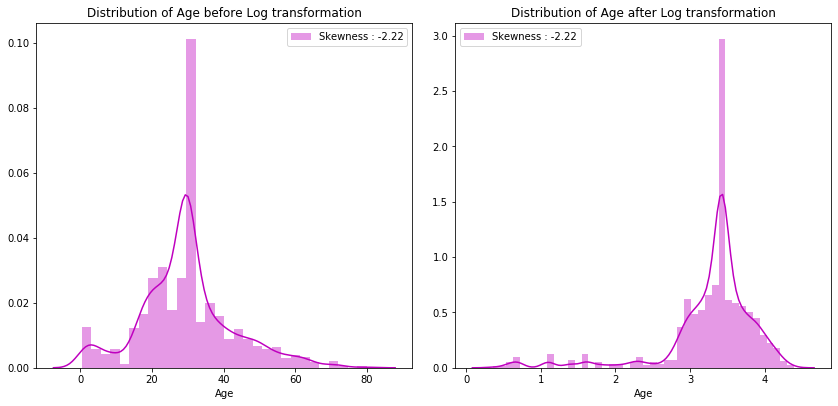

In [21]:
# log_transform
df = ds.feature_engineering.log_transform(df, columns=['Age'])

In [22]:
# merge_groupby
#sub_df is a sub data set of the orignal data set 

sub_df = df.loc[:,['PassengerId','Survived', 'Pclass']]
ds.feature_engineering.merge_groupby(data = sub_df, cat_features = ['Pclass'],statistics = ['count'], col_to_merge = 'Survived').head()

,PassengerId,Survived,Pclass,Pclass_Survived_count
0,1,0,3,491
1,2,1,1,216
2,3,1,3,491
3,4,1,1,216
4,5,0,3,491


In [23]:
# create_balanced_data
ds.feature_engineering.create_balanced_data (data = train_df, target = 'Sex', categories = ['male','female'], class_sizes = [5,5])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
1,504,0,3,"Laitinen, Miss. Kristina Sofia",female,37.0,0,0,4135,9.5875,NaN,S
2,442,0,3,"Hampe, Mr. Leon",male,20.0,0,0,345769,9.5000,NaN,S
3,502,0,3,"Canavan, Miss. Mary",female,21.0,0,0,364846,7.7500,NaN,Q
4,394,1,1,"Newell, Miss. Marjorie",female,23.0,1,0,35273,113.2750,D36,C
5,208,1,3,"Albimona, Mr. Nassef Cassem",male,26.0,0,0,2699,18.7875,NaN,C
6,446,1,1,"Dodge, Master. Washington",male,4.0,0,2,33638,81.8583,A34,S
7,810,1,1,"Chambers, Mrs. Norman Campbell (Bertha Griggs)",female,33.0,1,0,113806,53.1000,E8,S
8,282,0,3,"Olsson, Mr. Nils Johan Goransson",male,28.0,0,0,347464,7.8542,NaN,S
9,477,0,2,"Renouf, Mr. Peter Henry",male,34.0,1,0,31027,21.0000,NaN,S


In [24]:
# get_qcut
ds.feature_engineering.get_qcut(data = df, col = 'Age', q = [0, .25, .5, .75, 1.] )

0      0.350
1      3.584
2      3.135
3      3.424
4      3.424
       ...  
886    3.135
887    0.350
888    3.135
889    3.135
890    3.424
Name: Age, Length: 891, dtype: float64

## Time series
The timeseries module contains functions for working with date time features. It can help you extract from and visualize Date Features.
Some functions are:
- **extract_dates**: This function can be used to extract specified features like day of the week, day of the year, hour, min and second of the day from a specified date feature.
- **timeplot**: The timeplot function can help you visualize a set features against a particular time feature. This can help you identify trends and patterns.

You can refer the documentation for more: https://risingodegua.gitbook.io/datasist-doc/quickstart/part-1


## Visualization
- Visualization for categorical features:

  1. **boxplot**:  This function makes a box plot of all numerical features against a specified categorical target column.
  2. **catbox**: The catbox is used to make a side by side bar plot of all categorical features in a dataset against a specified categorical target.
  3. **countplot**: The countplot makes a barplot of all categorical feature to show their class count.
  
  
- Visualization for numerical features:

  1. **histogram**: This function makes an histogram plot of all numerical features in a dataset. This Helps to show distribution of the features.
  2. **scatterplot**: This function makes a scatter plot of all numerical features in a dataset against a specified **numerical target. It helps to show the correlation between features.
  3.  **plot_missing**: As the name implies, this function can be used to visualize the missing values in a dataset. White cells indicate missing and dark cells indicate not-missing. The color range at the right hand corner shows intensity values.



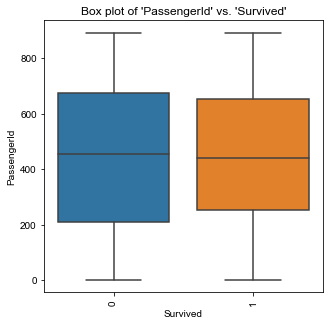

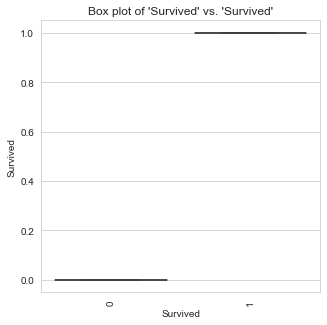

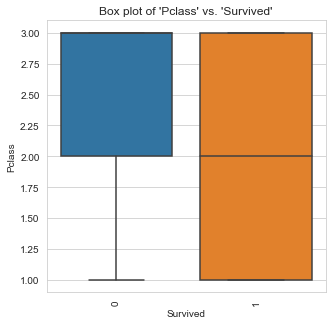

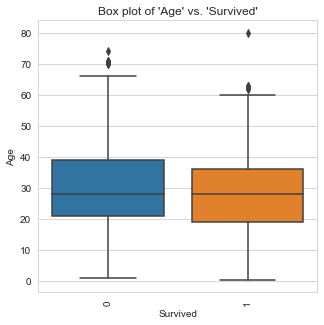

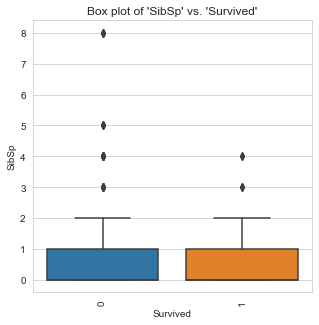

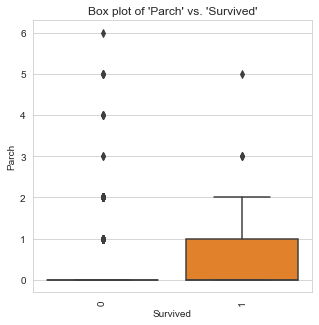

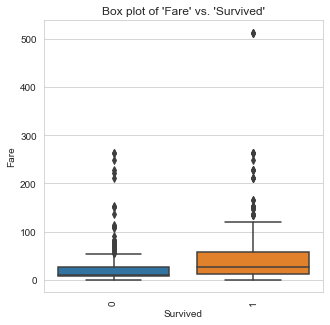

In [25]:
# boxplot
ds.visualizations.boxplot(train_df, target = 'Survived')

Name feature has too many categories and will not be ploted
Ticket feature has too many categories and will not be ploted
Cabin feature has too many categories and will not be ploted


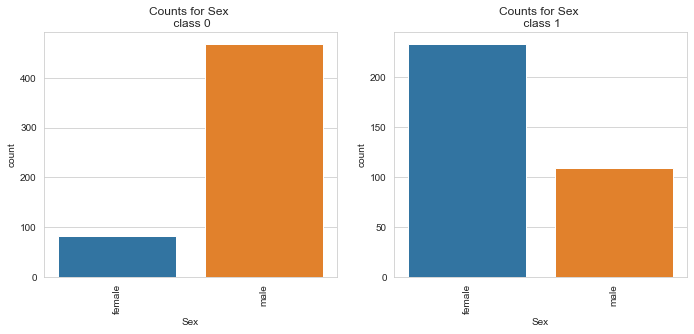

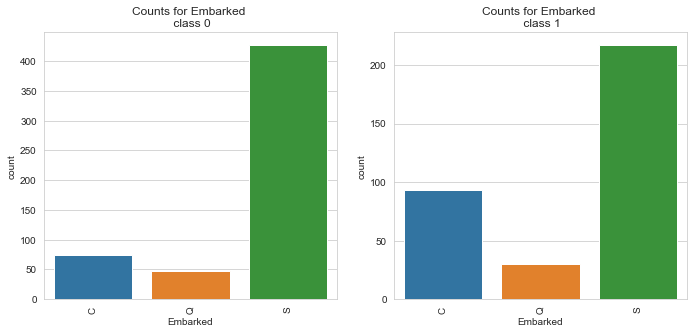

In [26]:
# catbox
ds.visualizations.catbox(train_df, target = 'Survived')

Unique Values in Name is too large to plot


Unique Values in Ticket is too large to plot


Unique Values in Cabin is too large to plot




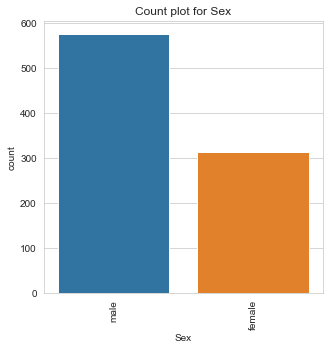

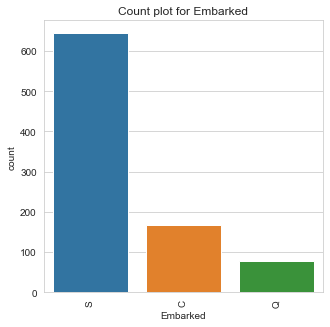

In [27]:
# countplot
ds.visualizations.countplot(train_df)

Unique Values in Name is too large to plot


Unique Values in Ticket is too large to plot


Unique Values in Cabin is too large to plot




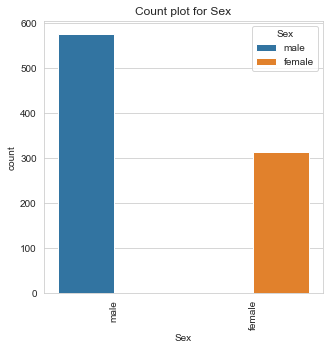

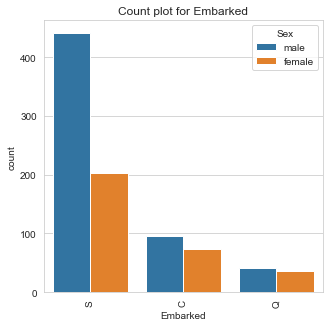

In [28]:
ds.visualizations.countplot(train_df, separate_by='Sex')

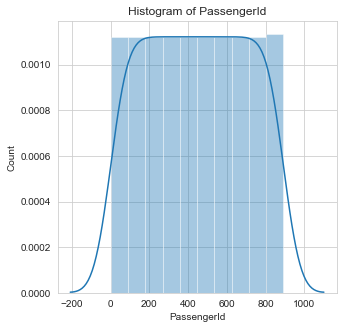

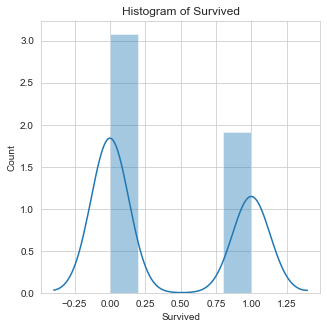

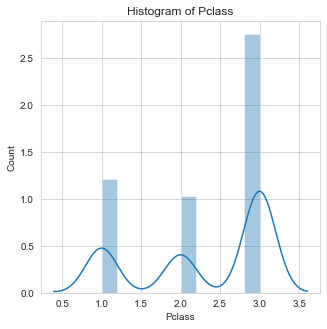

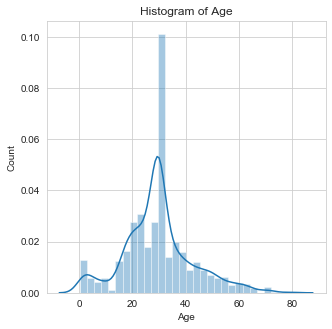

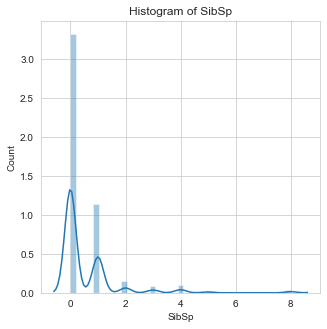

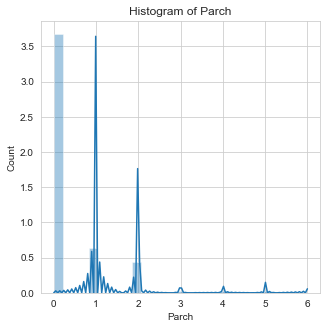

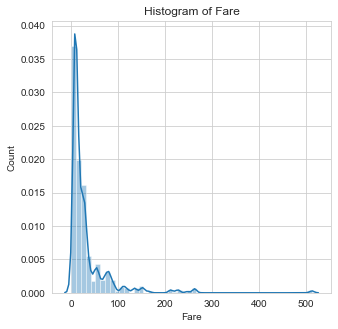

In [29]:
df = ds.feature_engineering.fill_missing_num(train_df)
ds.visualizations.histogram(df)

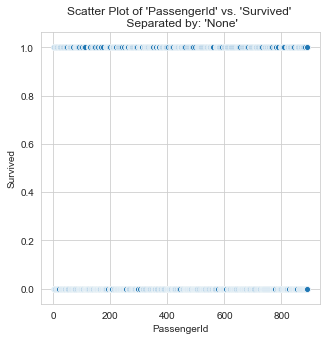

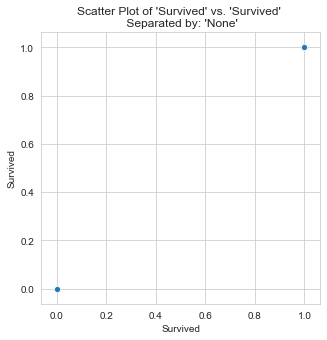

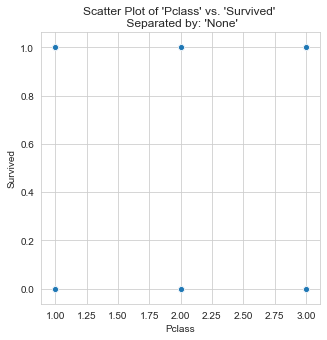

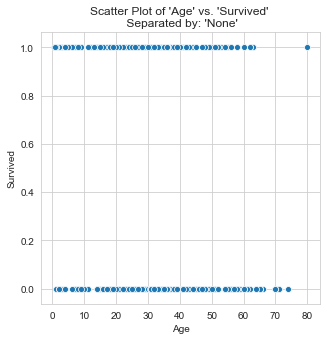

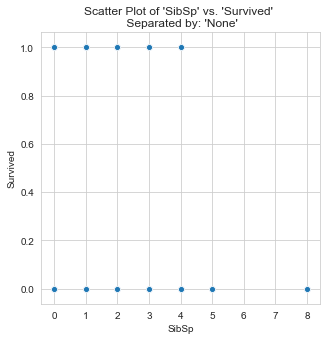

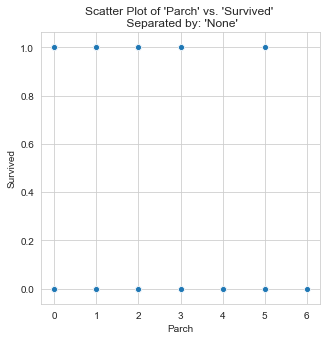

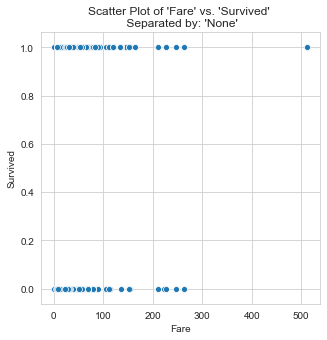

In [30]:
# scatterplot
num_feats = ds.structdata.get_num_feats(train_df)
ds.visualizations.scatterplot(train_df,num_features=num_feats, target='Survived')

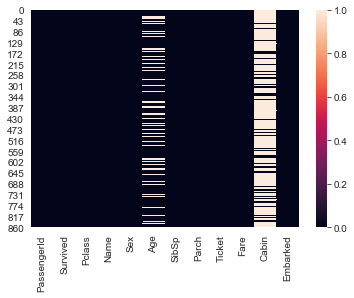

In [31]:
# plot_missing
ds.visualizations.plot_missing(train_df)

## Model
The model module contains functions and methods for testing and comparing machine learning models. Current version of datasist only supports sci-kit learn models. 
- **get_classification_report**: We can get a detailed metric report for a classification task using the get_classification_report function. This accepts as argument the predicted class and the truth value, and returns classification metrics like accuracy, f1_score, precision, recall and the confusion matrix.
- **plot_feature_importance**: This function can be used to make a bar plot of the most important features to a trained machine learning model.

In [32]:
# Read the dataset
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [33]:
#drop the id column
train_df.drop(columns='PassengerId', axis=1, inplace=True)
test_df.drop(columns='PassengerId', axis=1, inplace=True)

In [34]:
#fill missing values
train = ds.feature_engineering.fill_missing_cats(train_df)
train = ds.feature_engineering.fill_missing_num(train, method='mean')

test = ds.feature_engineering.fill_missing_cats(test_df)
test = ds.feature_engineering.fill_missing_num(test, method='mean')

ds.structdata.display_missing(train)

,features,missing_counts,missing_percent
0,Survived,0,0.0
1,Pclass,0,0.0
2,Name,0,0.0
3,Sex,0,0.0
4,Age,0,0.0
5,SibSp,0,0.0
6,Parch,0,0.0
7,Ticket,0,0.0
8,Fare,0,0.0
9,Cabin,0,0.0


In [35]:
#check the unique classes in each categorical feature
ds.structdata.class_count(train)

Unique classes in Name too large
Class Count for Sex


,Sex
male,577
female,314


Unique classes in Ticket too large
Unique classes in Cabin too large
Class Count for Embarked


,Embarked
S,646
C,168
Q,77


In [36]:
!pip install category_encoders

In [37]:
import category_encoders as ce

# drop target column
target = train['Survived'].values
train.drop(columns='Survived', axis=1, inplace=True)

train.drop(columns='Name', axis=1, inplace=True)
test.drop(columns='Name', axis=1, inplace=True)

In [38]:
enc = ce.OrdinalEncoder(cols=['Cabin','Ticket'])
enc.fit(train)
train_enc = enc.transform(train)
test_enc = enc.transform(test)

In [39]:
#one-hot-encode the rest categorical features
hot_enc = ce.OneHotEncoder()
hot_enc.fit(train_enc)
train_enc = hot_enc.transform(train_enc)
test_enc = hot_enc.transform(test_enc)
train_enc.head()

,Pclass,Sex_1,Sex_2,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_1,Embarked_2,Embarked_3
0,3,1,0,22.0,1,0,1,7.2500,1,1,0,0
1,1,0,1,38.0,1,0,2,71.2833,2,0,1,0
2,3,0,1,26.0,0,0,3,7.9250,1,1,0,0
3,1,0,1,35.0,1,0,4,53.1000,3,1,0,0
4,3,1,0,35.0,0,0,5,8.0500,1,1,0,0


In [40]:
print("Shape of train data after encoding: {}".format(train_enc.shape))
print("Shape of test data after encoding: {}".format(test_enc.shape))

Shape of train data after encoding: (891, 12)
Shape of test data after encoding: (418, 12)


In [41]:
train_enc.head(10)

,Pclass,Sex_1,Sex_2,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_1,Embarked_2,Embarked_3
0,3,1,0,22.000000,1,0,1,7.2500,1,1,0,0
1,1,0,1,38.000000,1,0,2,71.2833,2,0,1,0
2,3,0,1,26.000000,0,0,3,7.9250,1,1,0,0
3,1,0,1,35.000000,1,0,4,53.1000,3,1,0,0
4,3,1,0,35.000000,0,0,5,8.0500,1,1,0,0
5,3,1,0,29.699118,0,0,6,8.4583,1,0,0,1
6,1,1,0,54.000000,0,0,7,51.8625,4,1,0,0
7,3,1,0,2.000000,3,1,8,21.0750,1,1,0,0
8,3,0,1,27.000000,0,2,9,11.1333,1,1,0,0
9,2,0,1,14.000000,1,0,10,30.0708,1,0,1,0


We can drop the Sex_2 and Embarked_3 column as 0 value in Sex_1 will mean it is Female ,and Embarked_1=0 and Embarked_2=0 will mean it refers to Embarked_3 class.

In [42]:
train_enc.drop(columns = ['Sex_2','Embarked_3'], axis=1, inplace=True)
test_enc.drop(columns = ['Sex_2','Embarked_3'], axis=1, inplace=True)

In [43]:
train_enc.head()

,Pclass,Sex_1,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_1,Embarked_2
0,3,1,22.0,1,0,1,7.2500,1,1,0
1,1,0,38.0,1,0,2,71.2833,2,0,1
2,3,0,26.0,0,0,3,7.9250,1,1,0
3,1,0,35.0,1,0,4,53.1000,3,1,0
4,3,1,35.0,0,0,5,8.0500,1,1,0


In [44]:
!pip install lightgbm

In [45]:
!pip install xgboost

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import lightgbm as lgb
import xgboost as xgb

[21:47:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:47:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:47:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:47:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

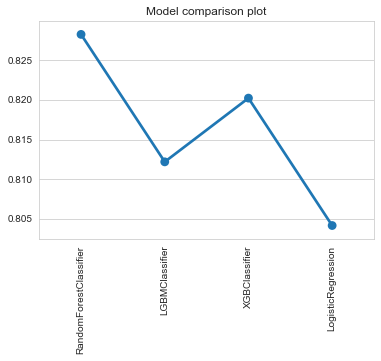

In [47]:
#split train data into train and test set
Xtrain, Xtest, ytrain, ytest = train_test_split(train_enc, target, test_size=0.3, random_state=1)

#define models you want to compare
rf_classifier = RandomForestClassifier(random_state=50)
lgb_classifier = lgb.LGBMClassifier(random_state=50)
xgb_classifier = xgb.XGBClassifier(random_state=50)
logm = LogisticRegression(random_state=50)
log_classifier = logm.fit(Xtrain, ytrain)

classifiers = [rf_classifier, lgb_classifier, xgb_classifier, log_classifier]

#compare the models
models, scores = ds.model.compare_model(models_list=classifiers, x_train=Xtrain, 
                                         y_train=ytrain, scoring_metric='accuracy')

From this sample analysis, the Random Forest Classifier is currently the best model. We can make predictions with this model without retraining as shown below:

In [48]:
#use the best model to make prediction on the test set
pred = models[0].predict(Xtest)

Accuracy is  74.0
F1 score is  66.0
Precision is  58.0
Recall is  76.0
****************************************************************************************************
confusion Matrix
                 Score positive    Score negative
Actual positive       132                48
Actual negative        21                67



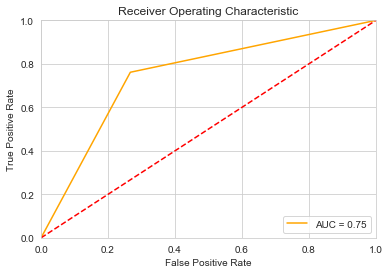

In [49]:
# get_classification_report
ds.model.get_classification_report(pred, ytest)

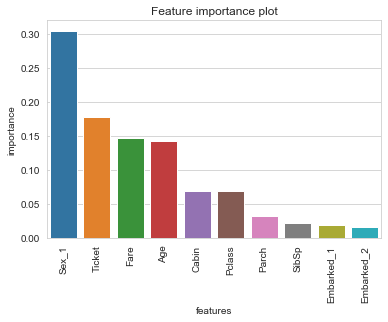

In [50]:
model = models[0]  #get a model from the list of returned models
features = train_enc.columns  #get the feature names from the processed data

ds.model.plot_feature_importance(model, features)

In [51]:
# Use the best model to make prediction on the test set
pred = models[0].predict(test_enc)

We can tune our hyperparameters. But as mentioned this notebook's target is to get our hands dirty on the Datasist package.


Explore more functions: https://risingodegua.gitbook.io/datasist-doc/api-documentation

Hope you liked this notebook and do try on a different datset.

Good Luck!